<a href="https://colab.research.google.com/github/abhinavtk1/ED5340-Codes/blob/main/MA23M002_LAB11_PART_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 11: PART 2-LOGISTIC REGRESSION

Logistic regression: Using the data provided (Logistic_regression_ls.csv), plot the decision boundary (linear) using Optimization of the sigmoid function.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/Logistic_regression_ls.csv')
df.head()

,x1,x2,label
0,7.395,7.638,1
1,4.987,6.485,1
2,5.358,6.499,1
3,2.036,2.380,0
4,5.956,7.378,1


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1/(1+np.exp(z))

def gradient_desc(X,y):
    m = X.shape[0]
    n = X.shape[1]
    wt = np.zeros(n+1)
    X_train = np.zeros((m,n+1))
    X_train[:,0] = 1
    X_train[:,1:] = X
    loss_list = []
    lr = 0.01
    for iter in range(5000):
      y_hat = sigmoid(X_train.dot(wt))
      loss = (1/m)*(-y.dot(np.log(y_hat + 1e-8)) - (1-y).dot(np.log(1-y_hat+ 1e-8)))
      loss_list.append(loss)
      grad = (1/m)*X_train.T.dot(y_hat - y)
      wt = wt - lr*grad
    return wt, loss_list

In [7]:
X = df[['x1','x2']]
y = df['label']
# Normalization
X.loc[:,'x1'] = (X['x1'] - np.mean(X['x1']))/np.std(X['x1'])
X.loc[:,'x2'] = (X['x2'] - np.mean(X['x2']))/np.std(X['x2'])
wt, loss_list = gradient_desc(X,y)

In [8]:
# decision bdry
x1_min, x1_max = X['x1'].min(), X['x1'].max()
x2_min, x2_max = X['x2'].min(), X['x2'].max()

In [9]:
# creating data points
a = np.linspace(x1_min, x1_max , 100)
b = np.linspace(x2_min, x2_max , 100)
a,b = np.meshgrid(a,b)
x_db = np.c_[np.ones(a.ravel().shape[0]),a.ravel(),b.ravel()]
h_db = sigmoid(x_db.dot(wt)).reshape(a.shape)

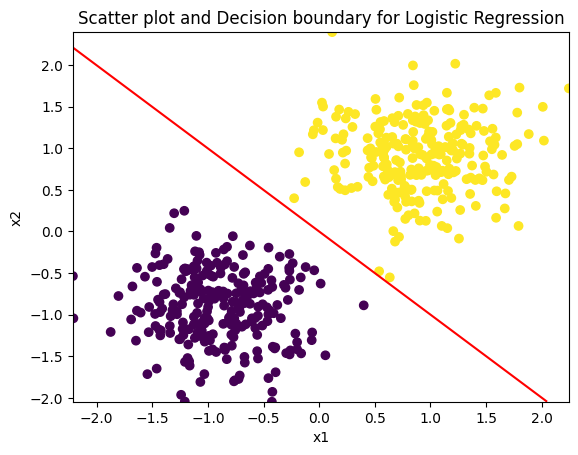

In [18]:
# Plotting
plt.contour(a,b, h_db, [0.5], colors = 'red')
plt.scatter(X['x1'], X['x2'], c = y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot and Decision boundary for Logistic Regression')
plt.show()